In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from math import sqrt
from pathlib import Path
import json

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import numpy as np
from scipy import signal

import rasterio
from rasterio.mask import mask
from rasterio.features import shapes, rasterize
from rasterio import Affine
from rasterio.warp import reproject, Resampling

import geopandas as gpd

from gridfinder._util import save_raster, clip_line_poly
from gridfinder.prepare import create_filter, prepare_ntl, prepare_roads

# Create filter

In [3]:
ntl_filter = create_filter()

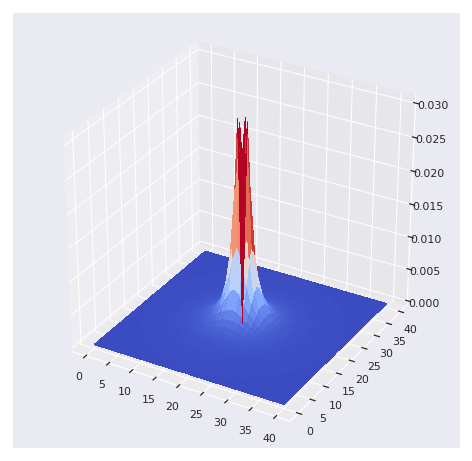

In [4]:
X = np.fromfunction(lambda i, j: i, ntl_filter.shape)
Y = np.fromfunction(lambda i, j: j, ntl_filter.shape)

fig = plt.figure(figsize=(8,8))
sns.set()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, ntl_filter, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Clip, filter and resample NTL

In [5]:
ntl_in = Path.home() / 'Downloads/VIIRS_2016_10.tif'
aoi_in = Path('tanzania/aoi.gpkg')

In [6]:
ntl, ntl_filtered, ntl_interp, ntl_thresh, affine = prepare_ntl(ntl_in, aoi_in,
                                                                ntl_filter=ntl_filter,
                                                                threshold=2.1,
                                                                upsample_by=3)

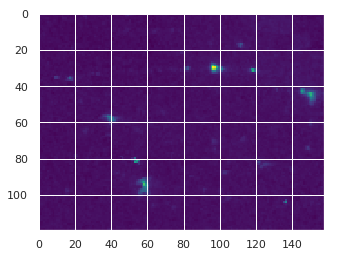

In [7]:
plt.imshow(ntl, cmap='viridis')

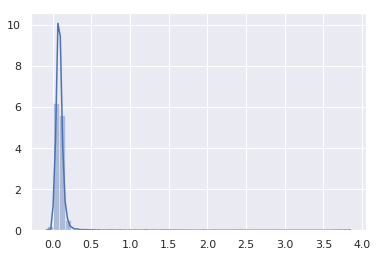

In [8]:
sns.distplot(ntl.flatten())

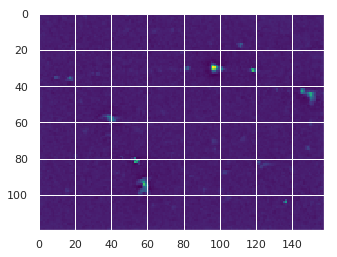

In [9]:
plt.imshow(ntl_filtered, cmap='viridis')

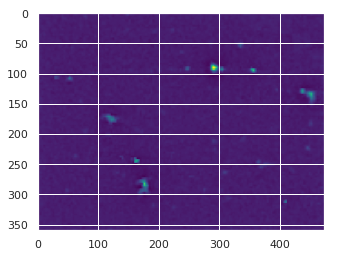

In [10]:
plt.imshow(ntl_interp, cmap='viridis')

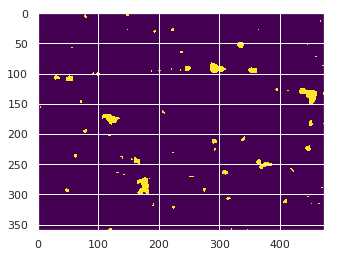

In [11]:
plt.imshow(ntl_thresh, cmap='viridis')

In [12]:
#save_raster('tanzania/ntl.tif', ntl_thresh, affine)

# Roads: assign values, clip and rasterize

In [13]:
roads_in = Path('tanzania/roads.gpkg')
aoi_in = Path('tanzania/aoi.gpkg')

In [ ]:
roads, roads_clipped, aoi, roads_raster, affine = prepare_roads(roads_in, aoi_in, ntl_thresh.shape, affine)

In [14]:
roads.head(2)

,osm_id,bridge,highway,layer,name,oneway,smoothness,surface,tunnel,width,z_index,geometry,weight
0,37421998,None,residential,None,None,None,None,None,None,None,3,"(LINESTRING (36.8071973 -6.1817831, 36.8078612...",0.25
1,37422046,None,residential,None,None,None,None,unpaved,None,None,3,"(LINESTRING (36.8487748 -6.1662254, 36.8493272...",0.25


In [15]:
len(roads)

3480

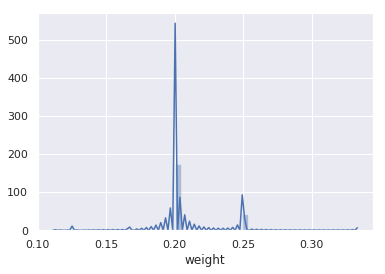

In [16]:
sns.distplot(roads['weight'])

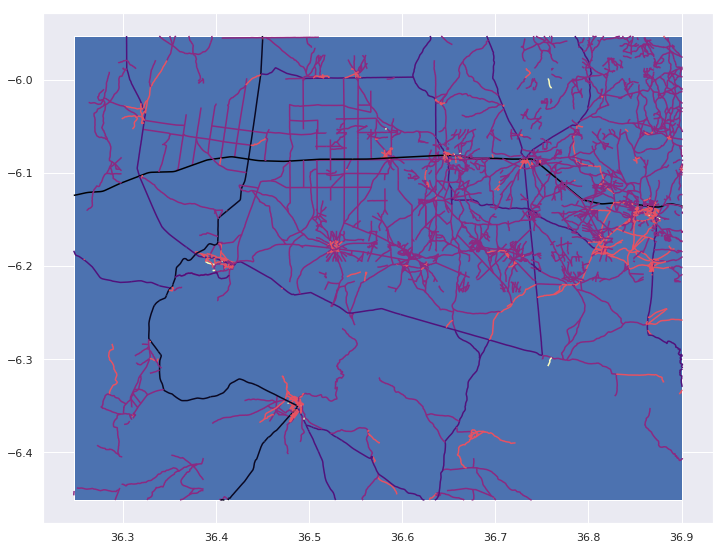

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
roads.plot(ax=ax, column='weight', cmap='magma')
aoi.plot(ax=ax)
plt.show()

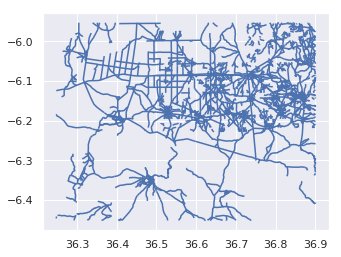

In [18]:
roads_clipped.plot()

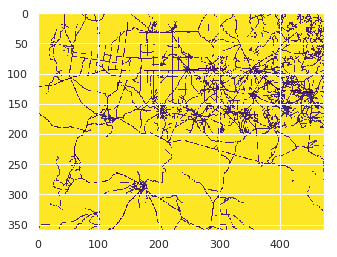

In [19]:
plt.imshow(roads_raster, cmap='viridis')

In [20]:
#save_raster('tanzania/roads_raster.tif', roads_raster, affine)